# Exercise 1

## Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Data preparation

In [2]:
csv_file_name = "advertising.csv" 

In [3]:
def get_data(file_name):
    data = np.genfromtxt(file_name, delimiter=',', skip_header=1)
    N = data.shape[0]
    
    X = data[:, :3]
    y = data[:, 3:]
    
    return data, X, y

def mean_normalization(X):
    N = len(X)
    
    maxi = np.max(X)
    mini = np.min(X)
    avg = np.mean(X)
    
    X = (X - avg) / (maxi - mini)
    X_b = np.c_[np.ones((N, 1)), X]
    
    return X_b, maxi, mini, avg 
    

In [4]:
data, X, y = get_data(csv_file_name)

In [5]:
X_b, maxi, mini, avg = mean_normalization(X)

## Debugging

In [6]:
thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])
print(thetas)

[[ 1.16270837]
 [-0.81960489]
 [ 1.39501033]
 [ 0.29763545]]


In [7]:
xi = X_b[3:4]
print(xi)

[[ 1.          0.2852446  -0.08655027 -0.02852058]]


In [8]:
yi_hat = np.dot(xi, thetas)
print(yi_hat)

[[0.79969324]]


In [9]:
y1 = np.array([[4],
      [5]])

y2 = np.array([[6],
      [7]])

(y1 - y2) * (y1 - y2)

array([[4],
       [4]])

In [10]:
y.shape

(200, 1)

## Linear Regression

In [11]:
def predict(xi, thetas):
    return np.dot(xi, thetas)

def compute_loss(yi_hat, yi):
    loss = (yi_hat - yi) * (yi_hat - yi)
    return loss 

def compute_gd_thetas(xi, yi_hat, yi):
    return np.dot(xi.T, 2 * (yi_hat - yi))

def update_thetas(thetas, thetas_gd, lr):
    new_thetas = thetas - lr * thetas_gd
    return new_thetas

### 1) Stochastic_Gradient_Descent

In [12]:
def stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.00001):
    thetas = np.asarray([[1.16270837], [ -0.81960489], [1.39501033], [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    N = len(y)
    
    for epoch in range(n_epochs):
        for i in range(N):
            random_index = i
            
            xi = X_b[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            # Predict
            yi_hat = predict(xi, thetas)
            # Loss
            loss = compute_loss(yi_hat, yi)
            # Gradient Descent for loss
            # loss_gd = compute_gd_loss(loss)
            
            # Gradient Descent for thetas 
            thetas_gd = compute_gd_thetas(xi, yi_hat, yi)
            # Update theta
            thetas = update_thetas(thetas, thetas_gd, learning_rate)
            # Logging
            thetas_path.append(thetas)
            losses.append(loss[0])
            
    return thetas_path, losses

In [13]:
sgd_thetas, losses = stochastic_gradient_descent(X_b, y, n_epochs=50, learning_rate=0.01)

In [14]:
def visualize_sgd(losses):
    x_axis = list(range(500))
    plt.plot(x_axis, losses[:500], color='r')
    plt.title("Losses using SGD Linear Regression")
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

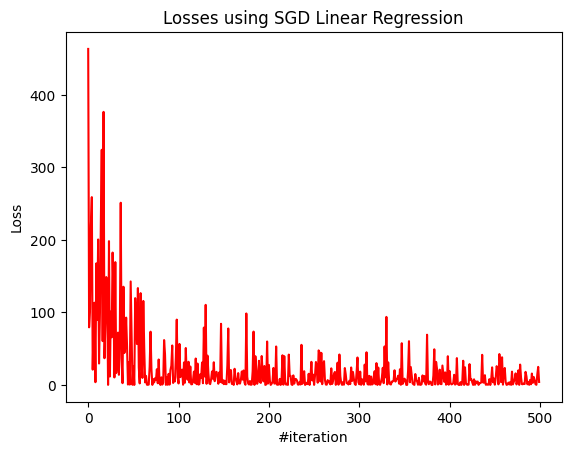

In [15]:
visualize_sgd(losses)

In [16]:
sgd_thetas, losses = stochastic_gradient_descent(X_b, y, n_epochs=1, learning_rate=0.01)
print(np.sum(losses))

8392.629213090673


Q1: c) 8754.64

### 2) Mini_Batch_Gradient_Descent

In [17]:
def mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01):
    thetas = np. asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])

    thetas_path = [ thetas ]
    losses = []
    
    N = len(y)
    
    for epoch in range(n_epochs):
        shuffled_indices = np. asarray ([21 , 144 , 17, 107 , 37, 115 , 167 , 31, 3,
        132 , 179 , 155 , 36, 191 , 182 , 170 , 27, 35, 162 , 25, 28, 73, 172 , 152 , 102 , 16,
        185 , 11, 1, 34, 177 , 29, 96, 22, 76, 196 , 6, 128 , 114 , 117 , 111 , 43, 57, 126 ,
        165 , 78, 151 , 104 , 110 , 53, 181 , 113 , 173 , 75, 23, 161 , 85, 94, 18, 148 , 190 ,
        169 , 149 , 79, 138 , 20, 108 , 137 , 93, 192 , 198 , 153 , 4, 45, 164 , 26, 8, 131 ,
        77, 80, 130 , 127 , 125 , 61, 10, 175 , 143 , 87, 33, 50, 54, 97, 9, 84, 188 , 139 ,
        195 , 72, 64, 194 , 44, 109 , 112 , 60, 86, 90, 140 , 171 , 59, 199 , 105 , 41, 147 ,
        92, 52, 124 , 71, 197 , 163 , 98, 189 , 103 , 51, 39, 180 , 74, 145 , 118 , 38, 47,
        174 , 100 , 184 , 183 , 160 , 69, 91, 82, 42, 89, 81, 186 , 136 , 63, 157 , 46, 67,
        129 , 120 , 116 , 32, 19, 187 , 70, 141 , 146 , 15, 58, 119 , 12, 95, 0, 40, 83, 24,
        168 , 150 , 178 , 49, 159 , 7, 193 , 48, 30, 14, 121 , 5, 142 , 65, 176 , 101 , 55,
        133 , 13, 106 , 66, 99, 68, 135 , 158 , 88, 62, 166 , 156 , 2, 134 , 56, 123 , 122 ,
        154])
        
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for i in range(0, N, minibatch_size):
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            
            yi_hat = predict(xi, thetas)
            
            loss = compute_loss(yi_hat, yi)
            
            thetas_gd = compute_gd_thetas(xi, yi_hat, yi)
            
            thetas = thetas - learning_rate * (thetas_gd / minibatch_size)
            thetas_path.append(thetas)
            
            loss_mean = np.sum(loss) / minibatch_size
            losses.append(loss_mean)
            
    return thetas_path, losses        

In [18]:
def visualize_mini_batch(losses):
    x_axis = list(range(200))
    plt.plot(x_axis, losses[:200], color='r')
    plt.title("Losses using Mini-Batch Linear Regression")
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

In [19]:
thetas_path, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)

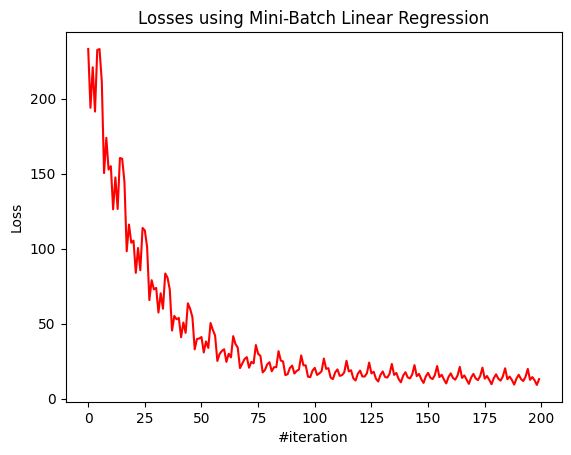

In [20]:
visualize_mini_batch(losses)

In [28]:
mbgd_thetas, losses = mini_batch_gradient_descent(X_b, y, n_epochs=50, minibatch_size=20, learning_rate=0.01)
print(round(sum(losses), 2))

11402.48


Q2: d) 8865.65

### 3) Batch Gradient Descent

In [22]:
def batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01):
    thetas = np. asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] , [0.29763545]])
    
    thetas_path = [thetas]
    losses = []
    
    N = len(y)
    
    for epoch in range(n_epochs):
        y_hat = predict(X_b, thetas)
        
        loss = compute_loss(y_hat, y)
        
        thetas_gd = compute_gd_thetas(X_b, y_hat, y)
        
        thetas = thetas - learning_rate * (thetas_gd / N)
        thetas_path.append(thetas)
        
        loss_mean = np.sum(loss) / N 
        losses.append(loss_mean)
        
    return thetas_path, losses

In [23]:
def visualize_bgd(losses):
    x_axis = list(range(100))
    plt.plot(x_axis, losses[:100], color='r')
    plt.title("Losses using Batch Linear Regression")
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

In [24]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

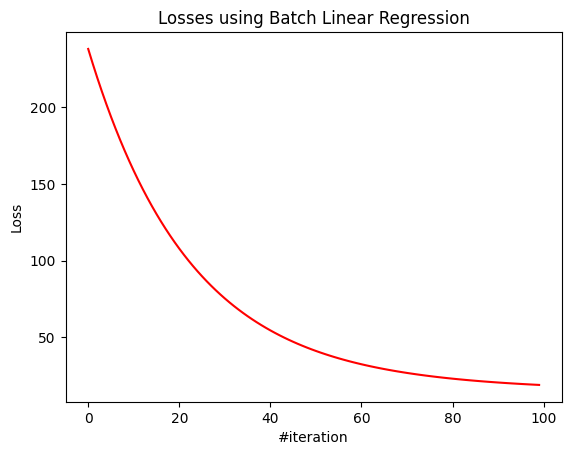

In [25]:
visualize_bgd(losses)

In [26]:
bgd_thetas, losses = batch_gradient_descent(X_b, y, n_epochs=100, learning_rate=0.01)

In [27]:
print(round(sum(losses), 2))

6716.46


Q3: c) 6716.46